<a href="https://colab.research.google.com/github/RoshanV1701/SentimentAnalysis/blob/main/SentimentAnalysis_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports and the keys


import base64
import requests
from datetime import datetime

base_url = 'https://api.twitter.com/'
client_key = 'a8LPL4fwytcWXdEl0ZvxNu3KN'
client_secret = 'q42fBpSqXuBUwktRvzruW2WILXPIxkJfLVigOVyk4kA0Igw1Gl'

In [ ]:
#get the token-oauth


key_secret = '{}:{}'.format(client_key, client_secret).encode('ascii')
b64_encoded_key = base64.b64encode(key_secret)
b64_encoded_key = b64_encoded_key.decode('ascii')

auth_url = base_url + 'oauth2/token'

In [ ]:
auth_headers = {
    'Authorization': ('Basic '+b64_encoded_key),
    'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'
}

auth_data = {
    'grant_type': 'client_credentials'
}

auth_resp = requests.post(auth_url, headers=auth_headers, data=auth_data)
access_token = auth_resp.json()['access_token']

In [ ]:
search_headers = {
    'Authorization': ('Bearer '+access_token)
}

search_params = {
    'q': 'Google',
#     'result_type': 'recent',
    'count': 50000,
    'tweet_mode' : 'extended'
}

search_url = base_url+'1.1/search/tweets.json'

search_resp = requests.get(search_url, headers=search_headers, params=search_params)

In [ ]:
json_needed = search_resp.json()
json_needed

{'statuses': [{'created_at': 'Mon Sep 19 17:40:27 +0000 2022',
   'id': 1571917145789050882,
   'id_str': '1571917145789050882',
   'full_text': 'RT @Baaabu_6: 🧼あわあわプレゼント⑥🎁\n／\n   選べるギフト券【1,000円】\n＼\n\n⬇️下記ギフト券から選べます♡\n(PayPay,Amazon,iTunes,Google)\n\n🔻応募方法🔻\n❏私と@Mashu_maro3150  フォロー\n❏この投稿RT♻️…',
   'truncated': False,
   'display_text_range': [0, 140],
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [{'screen_name': 'Baaabu_6',
      'name': '\U0001fae7あわ𝕔𝕙𝕒𝕟🧼❤️\u200d🔥',
      'id': 1343803047726567424,
      'id_str': '1343803047726567424',
      'indices': [3, 12]},
     {'screen_name': 'Mashu_maro3150',
      'name': 'マシュマロ 固ツイ🎁',
      'id': 1459885921973993473,
      'id_str': '1459885921973993473',
      'indices': [108, 123]}],
    'urls': []},
   'metadata': {'iso_language_code': 'ja', 'result_type': 'recent'},
   'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_statu

In [ ]:
json_needed.keys()
len(json_needed['statuses'])

100

In [ ]:
#Take all the en tweets and ignore the rest

filtered_tweets_list = []

for tweet in json_needed['statuses']:
    language = tweet['metadata']['iso_language_code']

    if(language == 'en'):
        try:
            a = str(filtered_tweets_list[i]['retweeted_status']['full_text'])

            filtered_tweets_list.append(a)

        except:
            filtered_tweets_list.append(tweet)

In [ ]:
len_of_filtered_tweets = len(filtered_tweets_list)
len_of_filtered_tweets

46

In [ ]:
#cannot afford incomplete tweets. Use retweeted status to get the full tweets' text
full_tweets = list()
i =1
for i in range(0,len_of_filtered_tweets):
    print(i)
    try:

        a = str(filtered_tweets_list[i]['retweeted_status']['full_text'])
        print(a+'\n\n\n\n')
        full_tweets.append(a)
        i+=1
    except:

        a = str(filtered_tweets_list[i]['full_text'])
        #print('\n\n\n\n\n\n\n\n SOMETHING NOT RIGHT!!')
        print(a+'\n\n\n\n')
        full_tweets.append(a)
        i+=1

0
Ok will do, thanks.
* toddles off to google *
Ah, Klinefelters only affects males, so is sex specific.
Turners only affects females, so is sex specific.
You're endorsing the sex binary. https://t.co/uAHMRHYO4q




1
@NPT1776 I can't find it. Not on the Google play store.




2
Happy International Talk Like a Pirate Day! (It's a thing. Google it.)

We are revamping the @Memeland website now. When it's ready, we will be announcing more details about our main collection. FINALLY!

Meanwhile, please enjoy the weekly prize draw by growing your Potatoz! 🥔 https://t.co/iTK9m1cMBz




3
Btw, when I Googled “Harry and Meghan lifetime movie” to find the name of the actress who played QE II in the Harry &amp; Meghan Lifetime movie trilogy (see alt text on image above), Google also offered up this fantastic “people also ask” item. https://t.co/Zp3F8cn3rR




4
🔥To celebrate @redlight listing on Sept 9, we'll give away 2,900 REDLC to 2000 winners ($10,000 Worth)!🤑🤑🤑
 
1⃣Follow @BitMartExchange &a

In [ ]:
#Detecting emoticons
import emoji
import regex

def removeEmojis(word):
    emojis = []
    result = ''
    for i in range(len(word)):

        charType = ord(word[i])

        if(charType > 122):
            emojis.append(ord(word[i]))
        else:
            result += word[i]

    return result, emojis

In [ ]:
def removePunctuations(word):
    punctuations = []
    result = ''
    for i in range(len(word)):

        charType = ord(word[i])

        if(word[i] == " "):
            result += " "
        if(charType >= 65 and charType <= 91):
            result += word[i]
        elif(charType >= 97 and charType <= 123):
            result += word[i]
        elif(charType >= 48 and charType <= 58):
            result += word[i]
        else:
            punctuations.append(word[i])

    return result, punctuations

In [ ]:
def textCleaner(txt):
    textEntities = txt.split()

    entities = []
    cleanedText = ''
    emojis = []

    for i in range(len(textEntities)-1):
        tType = ord(textEntities[i][0])

        ## Dealing with links
        if(textEntities[i][0:4] == "http"):
            continue


        ## Dealing with hashtags
        elif(textEntities[i][0] == '#'):

            try:
                if(textEntities[i+1][0] == '#'):
                    continue
            except:
                pass

            entities.append(textEntities[i][1:])
            textInFocus = textEntities[i][1:]
            firstOne = True

            for j in range(len(textInFocus)):

                c = textInFocus[j]

                if(c.isupper() and firstOne == True):
                    cleanedText += c
                    firstOne = False

                elif(c.isupper() and firstOne == False):
                    cleanedText += " " + c

                else:
                    cleanedText += c
                    firstOne = False

            cleanedText += " "
        ## Dealing with emojis
        elif(tType > 122):
            for emoji in textEntities[i]:
                em = ord(emoji)

                if(em in emojis):
                    continue
                else:
                    emojis.append(em)
        
        ## Dealing with rest of the other stuff
        else:
            textEntities[i], newEmos = removeEmojis(textEntities[i])

            for emoji in newEmos:
                if (emoji in emojis):
                    continue
                else:
                    emojis.append(emoji)

            cleanedText += textEntities[i] + " "

    cleanedText = cleanedText[:-1]

    for e in range(len(entities)):
        entities[e], puncs = removePunctuations(entities[e])

    return cleanedText, entities, emojis

In [ ]:
def emotionsFromEmojis(emoji):
    emotion = None
    if(emoji > 128512 and emoji < 128526):
        emotion = 1
    elif(emoji > 128527 and emoji < 128534):
        emotion = 0
    elif(emoji > 128542 and emoji < 128561):
        emotion = 0

    return emotion


In [ ]:
text, entities, emojis = textCleaner(full_tweets[10]) #change 

In [ ]:
text

'@truthorbare @RFCGW Didnt have a clue who he was Google clarified hes a grubby looking, old pervert'

In [ ]:
txt=list()
entit=list()
emos=list()

In [ ]:
for twt in full_tweets:
    text, entities, emojis = textCleaner(twt)
    txt.append(text)
    entit.append(entities)
    emos.append(emojis)

In [ ]:
entities = []
cleanedText = ''
emojis = []
clean = list()

In [ ]:
for tweet_in_focus in full_tweets:
    textEntities = tweet_in_focus.split()
    for i in range(len(textEntities)-1):
        tType = ord(textEntities[i][0])

        ## Dealing with links
        if(textEntities[i][0:4] == "http"):
            continue

        # Dealing with hashtags
        elif(textEntities[i][0] == '#'):

            entities.append(textEntities[i][1:])
            textInFocus = textEntities[i][1:]
            firstOne = True

            for j in range(len(textInFocus)):

                c = textInFocus[j]

                if(c.isupper() and firstOne == True):
                    cleanedText += c
                    firstOne = False

                elif(c.isupper() and firstOne == False):
                    cleanedText += " " + c

                else:
                    cleanedText += c
                    firstOne = False

            cleanedText += " "
            #clean.append(cleanedText)
        ## Dealing with emojis
        elif(tType > 122):
            for emoji in textEntities[i]:
                em = ord(emoji)

                if(em in emojis):
                    continue
                else:
                    emojis.append(em)

        ## Dealing with rest of the other stuff
        else:
            textEntities[i], newEmos = removeEmojis(textEntities[i])

            for emoji in newEmos:
                if (emoji in emojis):
                    continue
                else:
                    emojis.append(emoji)

            cleanedText += textEntities[i] + " "
            #clean.append(cleanedText)

    cleanedText = cleanedText[:-1]
    clean.append(cleanedText)

In [ ]:
    for e in range(len(entities)):
        entities[e], puncs = removePunctuations(entities[e])

In [ ]:
clean[1]
cleansed_tweets = clean
filtered_tweets = filtered_tweets_list

In [ ]:
for i in range(0,len(filtered_tweets)):
    tweet_id=filtered_tweets[i]['id']
    embReqUrl = 'https://publish.twitter.com/oembed?url=https://twitter.com/Interior/status/'+str(id) #+str(filtered_tweets[0]['id'])
    embResp = requests.post(embReqUrl)

In [ ]:
def getTweetSentimentFromEmojis(emojis):
    sentiment = None

    positiveCount = 0
    negativeCount = 0

    for e in emojis:
        sent = emotionsFromEmojis(e)

        if sent is not None:
            if sent is 1:
                positiveCount += 1
            else:
                negativeCount += 1

    if(positiveCount == 0 and negativeCount == 0):
        sentiment = 'neutral'
    elif(positiveCount>negativeCount):
        sentiment = 'positive'
    else:
        sentiment = 'negative'

    return sentiment


In [ ]:
def getTweetEssentials(tweet):

    userDetails = {}

    user = tweet['user']
    userDetails['user_id'] = user['id']
    userDetails['userName'] = user['screen_name']
    if(user['verified']):
        userDetails['verifiedStatus'] = 'yes'
    else:
        userDetails['verifiedStatus'] = 'no'

    userStats = {}
    userStats['favourites_count'] = user['favourites_count']
    userStats['followers_count'] = user['followers_count']
    userStats['following_count'] = user['following']
    userStats['friends_count'] = user['friends_count']
    userStats['location'] = user['location']

    if userStats['followers_count'] == None:
        userStats['followers_count'] = 0
    if userStats['following_count'] == None:
        userStats['following_count'] = 0

    userDetails['userStats'] = userStats

    tid = tweet['id']
    tDT = getTweetDT(tweet)

    try:
        txt = tweet['retweeted_status']['full_text']
    except:
        txt = tweet['full_text']

    text, enitites, emojis = textCleaner(txt)

    for et in tweet['entities']['hashtags']:
        ht = et['text']
        if ht in entities:
            continue
        else:
            entities.append(ht)


    sentiment = getTweetSentimentFromEmojis(emojis)
    full_text = txt

    return tid, tDT, userDetails, text, sentiment, full_text, entities


In [ ]:
symbs = []
for ft in filtered_tweets:
    if len(ft['entities']['symbols']) > 0:
        symbs.append(ft['entities']['symbols'])

In [ ]:
t_id = list()
t_DT = list()
t_user = list()
t_text = list()
t_sentiment = list()
t_full_text = list()
t_entities = list()

In [ ]:
def getTweetDT(tweet):
    tweetedTime = tweet['created_at']
    tweetedTime = tweetedTime[4:19] + ' ' + tweetedTime[-4:]
    tweetedDateTime = datetime.strptime(tweetedTime, '%b %d %H:%M:%S %Y')

    return tweetedDateTime

In [ ]:
for i in range(0, len(filtered_tweets)):
    tid, tDT, user, text, sentiment, full_text, entities = getTweetEssentials(filtered_tweets[i])
    t_id.append(tid)
    t_DT.append(tDT)
    t_user.append(user)
    t_text.append(text)
    t_sentiment.append(sentiment)
    t_full_text.append(full_text)
    t_entities.append(entities)

In [ ]:
print(t_id)

print(t_DT)

print(t_user)

print(t_text)

print(t_sentiment)

print(t_full_text)

print(t_entities)


[1571917145717772288, 1571917137740173312, 1571917135496220672, 1571917133629513729, 1571917132933529601, 1571917132203687936, 1571917131217866754, 1571917129867472898, 1571917128906809347, 1571917128650952707, 1571917121667600384, 1571917118060498944, 1571917116227612672, 1571917114839273472, 1571917112192401409, 1571917110418485248, 1571917110372175872, 1571917109797462020, 1571917106458857474, 1571917104227680263, 1571917104139603968, 1571917103686619137, 1571917103535632386, 1571917101606244353, 1571917101329436672, 1571917100020629504, 1571917099622072320, 1571917097999171584, 1571917096413691904, 1571917094261768194, 1571917092634624002, 1571917090482974720, 1571917088150650883, 1571917085676027909, 1571917084942307329, 1571917083700793345, 1571917078755708929, 1571917074821419012, 1571917074326294530, 1571917074154328065, 1571917073022058496, 1571917069444325377, 1571917066529083392, 1571917065346494464, 1571917064402518019, 1571917063844675589]
[datetime.datetime(2022, 9, 19, 1

In [ ]:
for i in range(0,len(t_sentiment)):
    print(t_text[i], ' : ', t_sentiment[i])
    print('\n\n\n')

Ok will do, thanks. * toddles off to google * Ah, Klinefelters only affects males, so is sex specific. Turners only affects females, so is sex specific. You're endorsing the sex binary.  :  neutral




@NPT1776 I can't find it. Not on the Google play  :  neutral




Happy International Talk Like a Pirate Day! (It's a thing. Google it.) We are revamping the @Memeland website now. When it's ready, we will be announcing more details about our main collection. FINALLY! Meanwhile, please enjoy the weekly prize draw by growing your Potatoz!  :  neutral




Btw, when I Googled and Meghan lifetime movie to find the name of the actress who played QE II in the Harry &amp; Meghan Lifetime movie trilogy (see alt text on image above), Google also offered up this fantastic also ask item.  :  neutral




celebrate @redlight listing on Sept 9, we'll give away 2,900 REDLC to 2000 winners ($10,000 Worth)! 1Follow @BitMartExchange &amp; @redlight 2Join &amp; 3RT &amp; tag 3frds 4Fill 11:59 AM UTC 9/24  :

<BarContainer object of 2 artists>

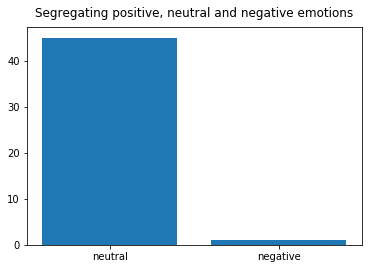

In [ ]:
import collections
import matplotlib.pyplot as plt
w = collections.Counter(t_sentiment)
plt.title("Segregating positive, neutral and negative emotions", y = 1.02)
plt.bar(w.keys(), w.values())